# Tidy Data Project: *2008 Olympic Medalists*
Welcome to my Jupyter Notebook! In this notebook, I will be using an adapted version of the [2008 Olympics Medalists](https://edjnet.github.io/OlympicsGoNUTS/2008/) dataset to introduce some tidydata principles in cleaning messay data and to show exactly how such principles provided the means through which interpretations/visualizations were formed. To use this notebook, download the *olympics_08_medalists.csv* file off my Github and ensure that the csv file is in the correct working directory. 

In [147]:
#Loading all relevant packages 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Importing the 2008 Olympic medalists data
df = pd.read_csv("C:data\olympics_08_medalists.csv")

#First 5 rows of the dataset
print(df.head())


       medalist_name male_archery female_archery male_athletics  \
0    Aaron Armstrong          NaN            NaN           gold   
1      Aaron Peirsol          NaN            NaN            NaN   
2   Abdullo Tangriev          NaN            NaN            NaN   
3  Abeer Abdelrahman          NaN            NaN            NaN   
4            Abhinav          NaN            NaN            NaN   

  female_athletics male_badminton female_badminton male_baseball  \
0              NaN            NaN              NaN           NaN   
1              NaN            NaN              NaN           NaN   
2              NaN            NaN              NaN           NaN   
3              NaN            NaN              NaN           NaN   
4              NaN            NaN              NaN           NaN   

  male_basketball female_basketball  ... female_beach volleyball  \
0             NaN               NaN  ...                     NaN   
1             NaN               NaN  ...            

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\rocco\AppData\Local\Temp\ipykernel_11564\3378451151.py:7: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv("C:data\olympics_08_medalists.csv")


In [148]:

# Using pd melt to organize the data in a way where each variable is in its own column, 
# each observation is in its own row, and each observational unit forming its own table
df_melted = pd.melt(df, id_vars=['medalist_name'],
                    value_vars=['male_archery', 'female_archery', 'male_athletics',	'female_athletics',	'male_badminton',	'female_badminton',	'male_baseball',
                                   	'male_basketball',	'female_basketball',	'male_boxing',	'male_canoeing and kayaking', 'female_canoeing and kayaking',	'male_road bicycle racing',	'female_road bicycle racing',	'male_track cycling',	
                                    'female_track cycling',	'male_mountain biking',	'female_mountain biking',	'male_bmx',	'female_bmx',	'male_diving',	'female_diving',
                                    'female_equestrian sport',	'male_equestrian sport',	'male_fencing',	'female_fencing',	'male_field hockey',	'female_field hockey',	'male_association football',	
                                    'female_association football',	'male_artistic gymnastics', 'female_artistic gymnastics',	'female_rhythmic gymnastics',	'male_trampoline gymnastics',	'female_trampoline gymnastics',	'male_handball',
                                    'female_handball',	'male_judo',	'female_judo',	'male_modern pentathlon',	'female_modern pentathlon',	'male_rowing',
                                    'female_rowing',	'male_sailing',	'female_sailing',	'male_shooting sport',	'female_shooting sport',	'female_softball',	'male_swimming',
                                    'female_swimming',	'female_synchronized swimming',	'male_table tennis',	'female_table tennis',	'male_taekwondo',
                                    'female_taekwondo',	'male_tennis',	'female_tennis',	'male_triathlon',	'female_triathlon',	'male_beach volleyball',
                                    'female_beach volleyball',	'male_volleyball',	'female_volleyball',	'male_water polo',	'female_water polo', 'male_weightlifting',
                                    'female_weightlifting',	'male_freestyle wrestling',	'female_freestyle wrestling',	'male_greco-roman wrestling'],
                    var_name='Sport', value_name='Medal')

# Dropping all the observations that do not contain a medal
df_clean = df_melted.dropna()

#Cleaning the medalist_name column name
df_clean = df_clean.rename(columns = {"medalist_name" : "Athelete"})

#Cleaning the sport names
df_clean["Sport"] = df_clean["Sport"].str.replace("_", " ").str.title()

# Exporting the cleaned data set for my github repository
df_clean.to_csv('data\cleaned_olympic.csv')

#Displaying the Data
df_clean


<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rocco\AppData\Local\Temp\ipykernel_11564\2474442386.py:27: SyntaxWarning: invalid escape sequence '\c'
  df_clean.to_csv('data\cleaned_olympic.csv')


,Athelete,Sport,Medal
177,Bair Badënov,Male Archery,bronze
676,Ilario Di Buò,Male Archery,silver
682,Im Dong-hyun,Male Archery,gold
760,Jiang Lin,Male Archery,bronze
920,Lee Chang-hwan,Male Archery,gold
...,...,...,...
130932,Steeve Guénot,Male Greco-Roman Wrestling,gold
131159,Yannick Szczepaniak,Male Greco-Roman Wrestling,bronze
131162,Yavor Yanakiev,Male Greco-Roman Wrestling,bronze
131200,Yury Patrikeyev,Male Greco-Roman Wrestling,bronze


In [149]:
# Aggregation/Pivot Table 

df_clean_pivot_arg = df_clean.pivot_table(index = 'Sport', columns = 'Medal', aggfunc = 'size', fill_value = 0)
df_clean_pivot_arg = df_clean_pivot_arg.rename(columns = {"bronze" : "Bronze", "silver" : "Silver", "gold" : "Gold"})


# Displaying the Data 
df_clean_pivot_arg

Medal,Bronze,Gold,Silver
Sport,,,
Female Archery,4,2,3
Female Artistic Gymnastics,7,7,6
Female Association Football,18,18,18
Female Athletics,26,27,28
Female Badminton,3,3,4
...,...,...,...
Male Trampoline Gymnastics,1,1,1
Male Triathlon,1,1,1
Male Volleyball,12,12,12


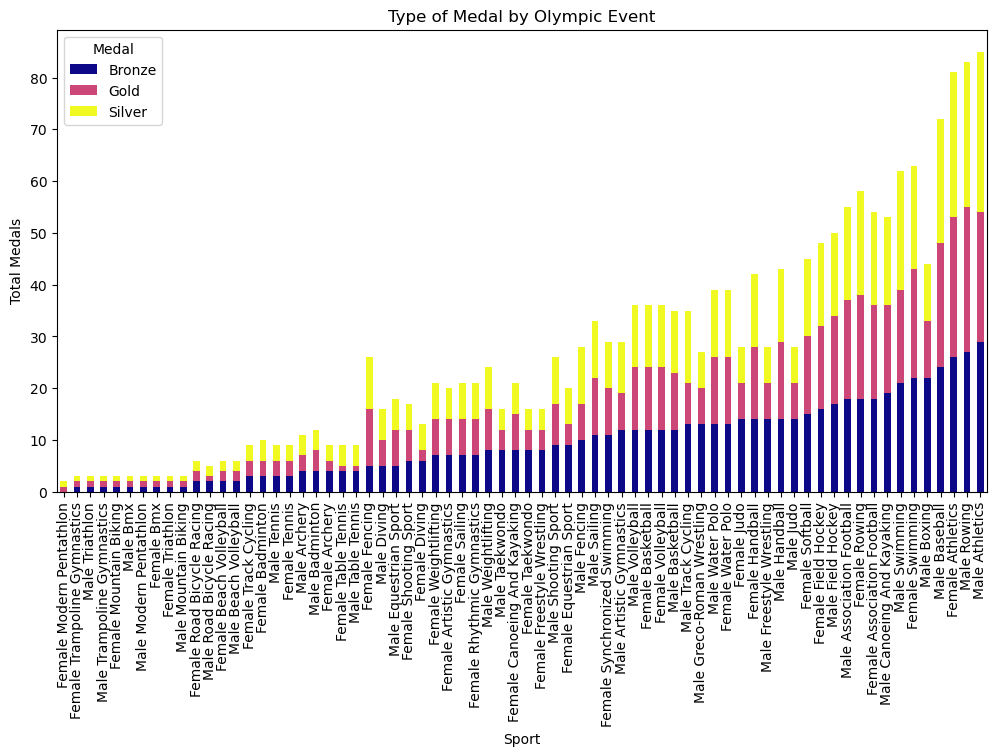

In [150]:
#Bar Graph Visualization 

df_clean_pivot_asc = df_clean_pivot_arg.sort_values("Bronze", ascending = True)
df_clean_pivot_asc.plot(kind="bar", stacked=True, figsize=(12,6), colormap="plasma")
plt.ylabel("Total Medals")
plt.title("Type of Medal by Olympic Event")
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\rocco\AppData\Local\Temp\ipykernel_11564\2216495270.py:15: SyntaxWarning: invalid escape sequence '\o'
  df_clean_pivot_arg.to_csv('data\olympic_pivot.csv')


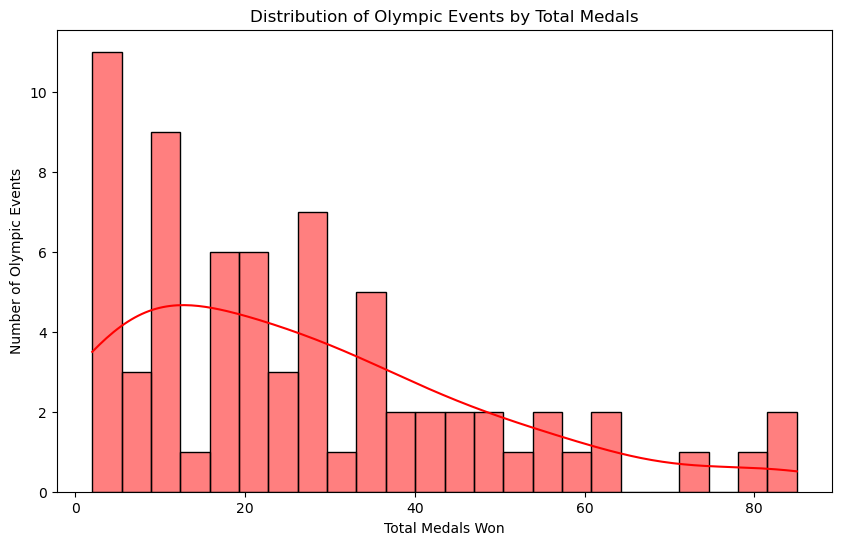

In [151]:
#Histogram Visualization
df_clean_pivot_arg["Total"] = df_clean_pivot_arg.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(df_clean_pivot_arg["Total"], bins=24, kde=True, color="red")

# Titles and labels
plt.title("Distribution of Olympic Events by Total Medals")
plt.xlabel("Total Medals Won")
plt.ylabel("Number of Olympic Events")

plt.show()

## Exporting the cleaned data set for my github repository
df_clean_pivot_arg.to_csv('data\olympic_pivot.csv')